## 지도학습은 입력과 출력 샘플 데이터가 있고, 
## 주어진 입력으로 부터 출력을 예측하고자 할때 사용한다.

* 우리의 목표는 이전에 본적없는 새로운 데이터에 대해 정확한 출력을 예측하는것.
* 지도 학습은 자동화 하면 힘들고 어려운 작업의 속도를 높일 수 있다.

# 1. 분류와 회귀

### - 지도학습에는 분류와 회귀가 있다.
* 분류 : 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측하는 것.
          ex) 붓꽃을 세 품종 중 하나로 분류하는 예
* 회귀 : 연속적인 숫자, 또는 프로그래밍 용오로 말하자면 부동 소수점수를 예측하는 것
          ex) 특정 사람의 교육 수준, 나이 , 주거지를 바탕으로 연간 소득을 예측하는 것



# 2. 일반화, 과대적합, 과소 적합


## - 일반화 : 훈련 세트로 학습한 모델을 테스트 세트에 적용하는 것
## - 과대적합 : 훈련 세트에 너무 맞춰줘있어 테스트 세트의 성능이 저하되는 현상
## - 과소적합 : 훈련세트를 충분히 반영하지 못해, 훈련세트, 테스트세트에서 모두 성능 저하되는 현상

# < 지도학습 알고리즘 실습 >

In [2]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib

CPython 3.7.0
IPython 6.5.0

sklearn 0.19.2
numpy 1.18.4
scipy 1.1.0
matplotlib 3.2.1


In [3]:
from preamble import *

C:\Users\A\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\A\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


## 일반화 과대적합 과소적합, 모델 복잡도와 데이터셋 사이즈간의 관계 알아보기

### 인위적 소규모 데이터셋 불러보기

### - 이진 분류 데이터셋 forge  

In [4]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

X.shape : (26, 2)


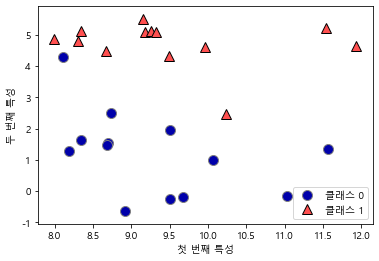

In [5]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.legend(["클래스 0", "클래스 1"], loc =4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape :", X.shape)
# 이 데이터 셋은 데이터 포인트 26개와, 특성 2개를 지녔다. 

## - 회귀 알고리즘 - wave 데이터셋 

Text(0, 0.5, '타깃')

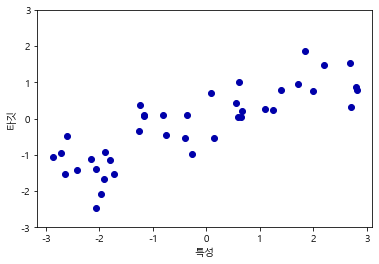

In [6]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('특성')
plt.ylabel('타깃')

## - 실제 데이터셋 사용해보기 

###  유방암 종양의 임상데이터가 기록된 위스콘신 유방암 데이터셋  -> 분류 분석용 데이터셋
* 각 종양은 양성(benign)과 악성(malignant)으로 레이블되어있고, 조직데이터를 기반으로 종양이 악성인지 예측

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [8]:
cancer_df = pd.DataFrame(cancer.data, columns= cancer.feature_names)

In [9]:
cancer_df['label'] = cancer.target

In [10]:
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,...,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,...,0.27,0.46,0.12,0
1,20.57,17.77,132.9,1326.0,...,0.19,0.28,0.09,0
2,19.69,21.25,130.0,1203.0,...,0.24,0.36,0.09,0


In [11]:
print("클래스 별 샘플 갯수 :\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스 별 샘플 갯수 :
 {'malignant': 212, 'benign': 357}


## 보스턴 주택가격 데이터셋 -> 회귀 분석용 실제 데이터셋

In [12]:
from sklearn.datasets import load_boston
boston = load_boston()
print('데이터의 형태 :', boston.data.shape)

데이터의 형태 : (506, 13)


In [13]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape", X.shape)
# 특성이 extended된 보스턴 데이터셋

X.shape (506, 104)


# 알고리즘 1. k- 최근접 이웃

* 위에서 이미 호출한 forge 데이터셋을 이용해 k_최근접 이웃 분류 해보기

## - 가장 간단한 knn 알고리즘은 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측

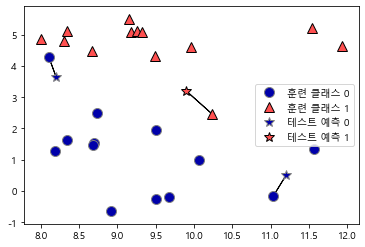

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

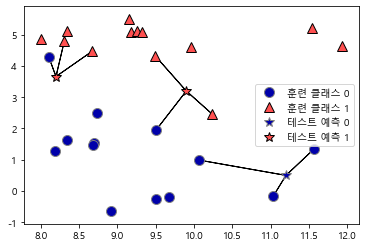

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

## - 이웃 갯수가 늘어남에 따라 예측된 포인트의 색(클래스) 가 달라짐이 보인다.

## 1.1실제 scikit_learn 을 사용해 k-nn 알고리즘 적용 과정 살펴보기

In [16]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state = 0)
# train 셋 -> 75%, test 셋 -> 25%

In [17]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [18]:
print('테스트 셋 예측 : ', clf.predict(X_test))

테스트 셋 예측 :  [1 0 1 0 1 0 0]


In [19]:
print('테스트 셋 정확도 : {:.2f}'.format(clf.score(X_test,y_test)))

테스트 셋 정확도 : 0.86


## KNeighborsClassfier 분석 
### - forge 데이터셋은 단순히 2차원 데이터셋이므로, 모든 테스트 포인트의 예측을 x,y평면에 그려볼 수 있다.
### - 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 결정 경계를 볼수있다.

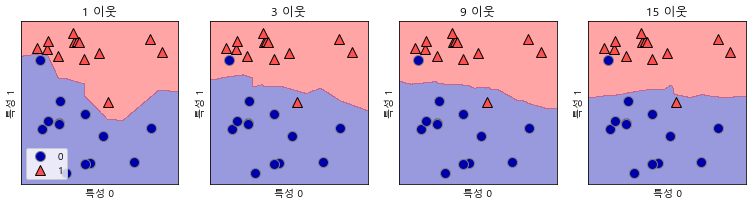

In [20]:
fig, axes = plt.subplots(1,4, figsize = (13,3))
for n_neighbors, ax in zip([1,3,9, 15], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    #fit 메서드는 self 오브젝트를 리턴하기 때문에 객체생성과 fit 메서드를 한 줄에 쓸 수 있다.
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc = 3)

### - 이웃을 적게 사용하면 복잡도가 높아지고, 많이 사용하면 복잡도가 낮아진다. 

# 1.2 유방암 분류 데이터셋으로, 복잡도와 일반화 사이의 관계 입증하기

In [21]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, stratify = cancer.target, random_state = 66)
#stratify -> train/test 비율을 75:25 기본값으로 쓰겠다.

training_accuracy =[]
test_accuracy = []
neighbors_setting = range(1,11)

### -이웃의 갯수에 따라, knn알고리즘의 훈련세트와 일반화의 정확도를 비교해보자!

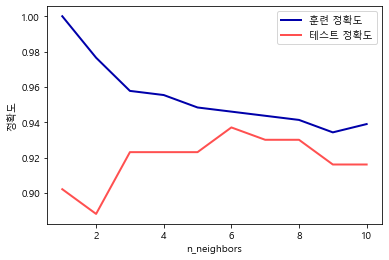

In [22]:
for n_neighbors in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장 
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_setting, training_accuracy, label= '훈련 정확도')
plt.plot(neighbors_setting, test_accuracy, label = '테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()
    
    

### 과대적합, 과소적합의 특징 보기
### 결과 -> 훈련데이터 - 이웃의 수가 하나일때 예측이 완벽하나, 이웃의 수가 늘면 모델이 단순, 정확도가 준다.
###             테스트 셋 - 이웃의 수가 적을때의 정확도가 많을때에 비교해 낮다. 1~2-최근접 이웃이 모델을 복잡하게 만든다는 것, 반대로 이웃이 10개일땐 모델이 너무 단순해져서 정확도도 더욱 나빠진다.

### -> 훈련 정확도와, 테스트 정확도의 차이가 가장 적은 이웃갯수를 기반으로 모델을 형성하는게 좋은 방향성이다.

#  k-최근접 이웃 회귀 

### - wave 데이터 셋에 대한 1-최근접 이웃 회귀 모델의 예측

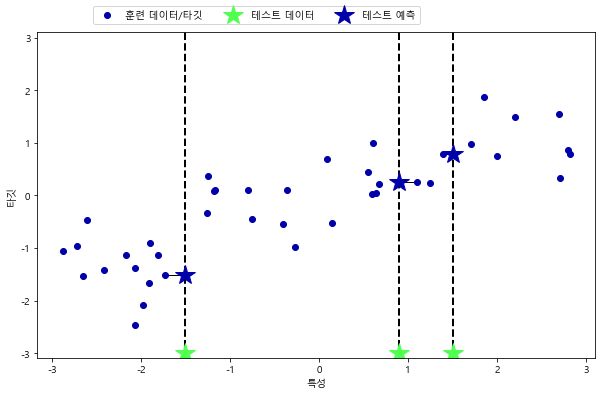

In [23]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

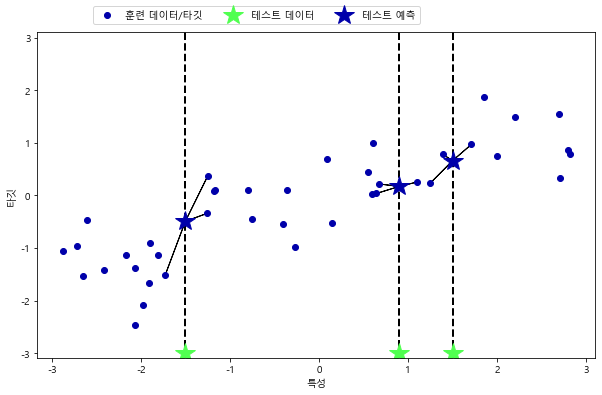

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

### -scikit_learn 에서 회귀를 위한 KNeighborsRegressor 최근접 이웃 알고리즘 사용 -> wave데이터셋

In [25]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples = 40)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train, y_train)

print('테스트 세트 예측 :\n',reg.predict(X_test))

테스트 세트 예측 :
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [26]:
print('테스트 세트 R^2 : {:.2f}'.format(reg.score(X_test, y_test)))
# 이웃의 갯수가 3개일 경우의 회귀 데이터셋에 대한 예측의 정확도는 0.83 -> 비교적 갠춘

테스트 세트 R^2 : 0.83


## - wave 회귀 데이터셋을 이용한 KNeighborsRegressor 분석

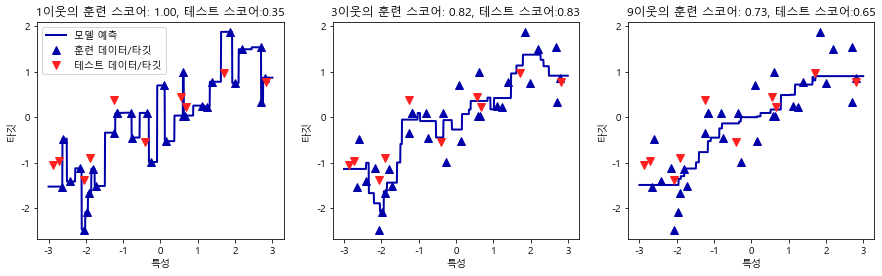

In [27]:
fig, axes = plt.subplots(1,3,figsize = (15,4))

line = np.linspace(-3,3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    ax.set_title(
    "{}이웃의 훈련 스코어: {:.2f}, 테스트 스코어:{:.2f}".format(n_neighbors, reg.score(X_train,y_train),
                                                 reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    
axes[0].legend(['모델 예측', '훈련 데이터/타깃', '테스트 데이터/타깃'], loc = 'best')

# knn 알고리즘의 장단점과 매개변수

* k-nn의 장점은 이해하기 매우 쉬운 모델이라는점이며, 많이 조정하지 않아도 자주 좋은 성능을 발휘한다. 모델 생성이 매우 빠르지만, 훈련 세트가 크면 어쩔수 없이 예측이 느려질 수는 있다.
* 많은 특성이 feature로 들어가게 되면 능력과 성능이 현저히 떨어진다.

# 선형 모델

* 선형모델은 입력 특성에 대한 선형함수를 만들어 예측을 수행한다.



w[0]: 0.393906  b: -0.031804


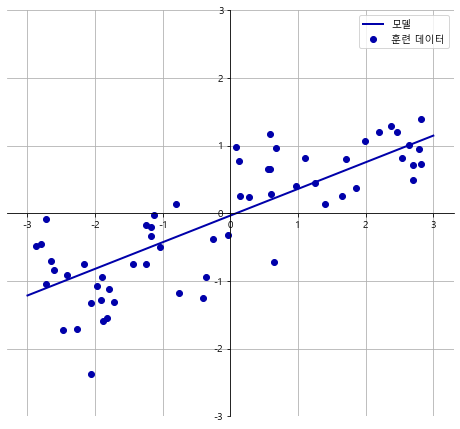

In [28]:
mglearn.plots.plot_linear_regression_wave()

# 선형 회귀(최소 제곱법)

* 가장 간단하고 오래된 회귀용 선형 알고리즘으로, 예측과 훈련세트에 있는 타깃 y 사이의 평균 제곱오차를 최소화하는 파라미터 w와 b를 찾는다.
* 평균 제곱오차는 예측값과 타깃값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것이다. 
* 선형 회귀는 매개변수가 없는 것이 장점이지만, 그래서 모델의 복잡도를 제어할 방법도 없다.

In [29]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

In [30]:
print('lr.corf', lr.coef_)
print('lr.intercept_', lr.intercept_)

lr.corf [0.394]
lr.intercept_ -0.031804343026759746


In [31]:
print('훈련 세트 점수 :{:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수 :{:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수 :0.67
테스트 세트 점수 :0.66


* score이 0.66인 것은 그리 좋은 모델의 결과가 아니지만, 훈련 셋과 테스트셋의 점수가 비슷해 과소적합인 상태를 의미한다.
* 1차원 데이터셋에서는 모델이 매우 단순해서. 과대적합을 걱정할 필요가 없으나 고차원데이터셋에서는 선형모델의 성능이 매우 떨어질 수 있다.


## 선형회귀 - 보스턴 데이터셋에 적용해보기 

In [32]:
X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =0)
lr = LinearRegression().fit(X_train, y_train)
print('훈련 세트 점수 :{:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수 :{:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수 :0.95
테스트 세트 점수 :0.61


* 훈련데이터와 테스트 데이터 사이의 이런 성능 차이는 모델이 과대적합되었다는 확실한 신호로 복잡도를 제어할 수 있는 모델을 사용해야 한다.

# 리지(Ridge)회귀
* 리지도 회귀를 위한 선형모델로, 최소 적합법에서 사용한 것과 같은 예측 함수를 사용한다.
* 하지만 리지회귀에선 가중치(w)를 선택할 수 있기 때문에 훈련데이터를 더 잘 예측하고, 추가 제약조건도 만족시킬 수 있다.
* 가중치의 목적은 모든 특성이 출력에 주는 영향을 최소한으로 만들고(기울기를 작게) 이러한 제약을 규제라 한다.
* 규제란 과대적합(훈련셋과 테스트셋 사이의 성능차이가 큰 것)이 되지 않도록 제한하는 것. 이러한 규제를 L2 규제라한다.

In [33]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("훈련 셋트 점수 :{:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 셋트 점수 :{:.2f}".format(ridge.score(X_test, y_test)))


훈련 셋트 점수 :0.89
테스트 셋트 점수 :0.75


* 선형회귀는 과대적합이지만, Ridge는 덜 자유로운 모델이라 과대적합이 적어진다.
* 모델의 복잡도가 낮아지면 훈련 세트에서의 성능은 나빠질 수 있지만 더 일반화 된 모델이 되어 추구하는 방향성이 맞다.

In [35]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("훈련 셋트 점수 :{:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 셋트 점수 :{:.2f}".format(ridge10.score(X_test, y_test)))

훈련 셋트 점수 :0.79
테스트 셋트 점수 :0.64


* 사용자는 alpha 매개변수로 훈련 세트의 성능대비 모델을 얼마나 단순화 할지 지정할 수있다.기본값은 1.0
* alpha 매개변수를 높이면 계수를 0 에 더 가깝게 만들어 훈련셋의 성능은 저하될 순 있으나 일반화에는 도움이 된다.
* alpha = 0.00001로 지정하면 선형 회귀 모델과 같아진다.

In [45]:
ridge05 = Ridge(alpha = 0.5).fit(X_train, y_train)
print("훈련 셋트 점수 :{:.2f}".format(ridge05.score(X_train, y_train)))
print("테스트 셋트 점수 :{:.2f}".format(ridge05.score(X_test, y_test)))

훈련 셋트 점수 :0.90
테스트 셋트 점수 :0.77


* alpha 값에 따라, 사용자가 추구하는 성능의 방향성을 조정할 수 있다. 좋은 매개변수를 선택하는것은 5장에서!
* 우선은 테스트 셋과 훈련셋의 점수차이가 크지 않은쪽으로 방향서을 잡고 가자!

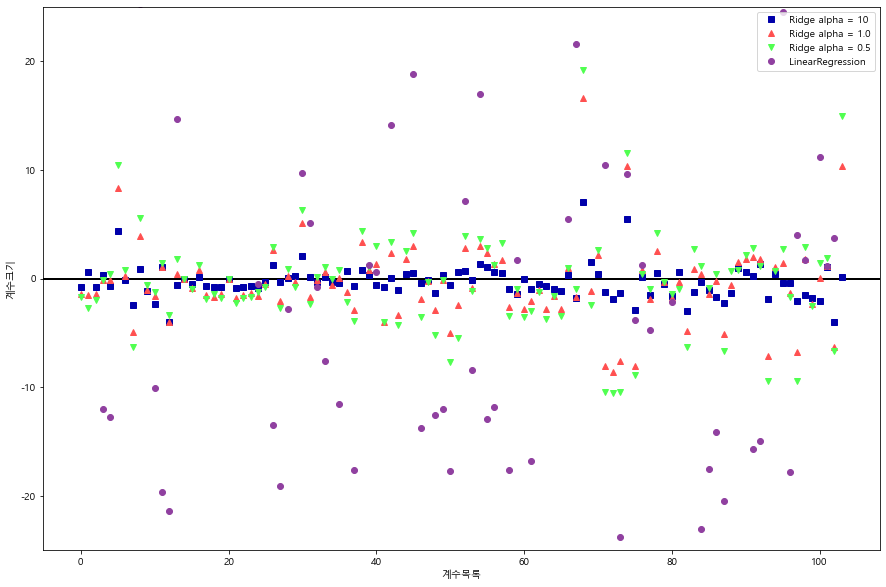

In [64]:
plt.subplots(figsize = (15,10))
plt.plot(ridge10.coef_,'s', label = 'Ridge alpha = 10')# coef_ 은 속성(w)을 의미
plt.plot(ridge.coef_,'^', label = 'Ridge alpha = 1.0')
plt.plot(ridge05.coef_,'v', label = 'Ridge alpha = 0.5')
plt.plot(lr.coef_,'o', label = 'LinearRegression')
plt.xlabel('계수목록')
plt.ylabel('계수크기')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

* x축은 coef_의 원소를 위치대로 나열한것이다. (데이터셋의 특성의 갯수가 100개!)
* y축은 각각의 계수에 대한 수치를 나타낸다. alpha = 10일땐 계수가 대체로 -3~3사이에 위치하고, 1일땐 계수가 쫌더 커졋다. 
* alpha = 0.1 일때는 계수가 더커지며, 규제없는 선형회귀의 계수는 값이 더커져 그림밖으로 넘어간다.

## - 그럼 alpha를 고정하고, 데이터셋의 크기를 바꿔보면?!

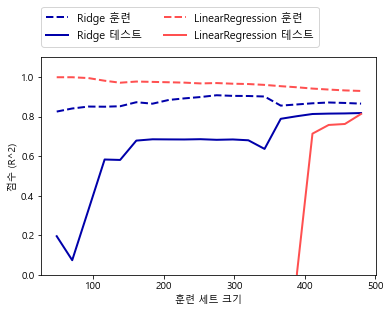

In [49]:
mglearn.plots.plot_ridge_n_samples() # alpha =1 로 적용된 보스턴 주택가격 데이터셋 크기별로 샘플링

* 위와 같이, 전체적 훈련셋에 대한 성능은 선형회귀가 더 좋다. 하지만 선형회귀에서 400미만의 세트 크기에 대한 테스트 성능이 전혀 나타나지 않고 있다.
* 테스트셋에대한 성능은 전체적으로 Ridge 회귀가 더 좋다. 적은 훈련셋에서도 테스트셋에대한 성능이 측정될 수 있다. 
* 하지만 충분히 많은 데이터를 주면 규제항의 영향이 적어져 리지회귀와 선형회귀사이의 성능 차이가 적어 진다. 

# 라소(Lasso)

## 선형 회귀에 규제를 적용하는데 Ridge 대안으로 Lasso 가 있다. 
* 릿지회귀에서와 같이 라쏘도 계수를 0에가깝게 하려고 한다. 이를 l1규제라 하는데 어떤경우의 계수가 완전히 0일때도 있다. 
* 따라서 이말은, 어떠한 특성은 모델링에서 완전히 제외될 수도 있다는 뜻이다.

In [66]:
from sklearn.linear_model import Lasso 

lasso = Lasso().fit(X_train, y_train)
print("X.shape :", X.shape)

print("훈련 셋트 점수 :{:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 셋트 점수 :{:.2f}".format(lasso.score(X_test, y_test)))
print('사용한 특성의 갯수:', np.sum(lasso.coef_ != 0))
print('사용한 max_iter : ', lasso.n_iter_)

X.shape : (506, 104)
훈련 셋트 점수 :0.29
테스트 셋트 점수 :0.21
사용한 특성의 갯수: 4
사용한 max_iter :  34


* 과소 적합으로, 104개의 보스턴 특성중 단 4개만 사용하였다. Ridge도 매개변수 alpha를 지원하고, 기본값은 1.0이다.
* 위와 같은 과소적합을 줄이기 위해 alpha값을 줄이고, 반복실행하는 최대횟수 매개변수인 max_iter 을 늘려보겠다. 

In [67]:
lasso001 = Lasso(alpha = 0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 셋트 점수 :{:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 셋트 점수 :{:.2f}".format(lasso001.score(X_test, y_test)))
print('사용한 특성의 갯수:', np.sum(lasso001.coef_ != 0))
print('사용한 max_iter : ', lasso001.n_iter_)

훈련 셋트 점수 :0.90
테스트 셋트 점수 :0.77
사용한 특성의 갯수: 33
사용한 max_iter :  1863


* 이 결과, 성능은 Ridge와 유사하거나 좀더 나은데, 사용된 특성이 33개뿐이어서 모델 분석이 더 쉬울 수 있다. 

In [65]:
lasso00001 = Lasso(alpha = 0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 셋트 점수 :{:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 셋트 점수 :{:.2f}".format(lasso00001.score(X_test, y_test)))
print('사용한 특성의 갯수:', np.sum(lasso00001.coef_ != 0))
print('사용한 max_iter : ', lasso00001.n_iter_)

훈련 셋트 점수 :0.95
테스트 셋트 점수 :0.64
사용한 특성의 갯수: 94
사용한 max_iter :  42005


* 위와 같이, alpha 값을 너무 낮추면 규제의 효과가 없어서 과대적합이 되므로, 선형회귀의 결과와 비슷하게된다.

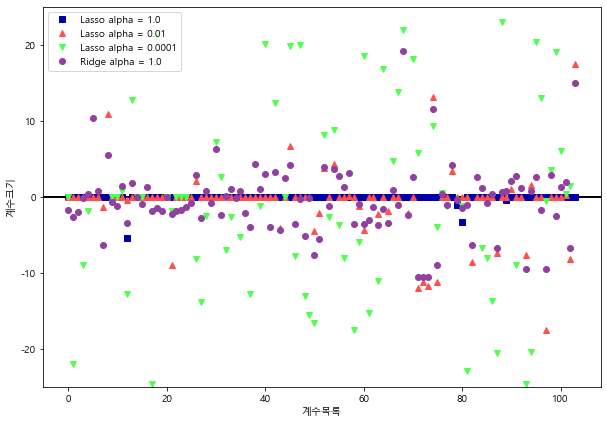

In [62]:
plt.subplots(figsize = (10,7))
plt.plot(lasso.coef_,'s', label = 'Lasso alpha = 1.0')# coef_ 은 속성(w)을 의미
plt.plot(lasso001.coef_,'^', label = 'Lasso alpha = 0.01')
plt.plot(lasso00001.coef_,'v', label = 'Lasso alpha = 0.0001')
plt.plot(ridge01.coef_,'o', label = 'Ridge alpha = 1.0')
plt.xlabel('계수목록')
plt.ylabel('계수크기')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

* 위의 결과와 같이 alpha = 0.1 인 lasso와 ridge를 비교해보면 어떠한 ridge 계수도 0이 되진 않지만, lasso 계수는 0이있다 
* 위의 결과는 lasso에선 사용하지 않는 특성이 있다는 뜻이고, 비교적 0이 아닌 계수의 크기는 비슷하게 나타난다.
* 그리고 alpha 가 0.0001인 lasso 회귀의 요소는 비교적 값도 커지고 대부분이 0이 아니어서 규제받지 않는 형태를 나타낸다. 

### - 실제로 두 모델 중 보통은 리지회귀를 선호하나, 분석하기 쉬운모델을 원할땐 Lasso 가 더좋을때도 있다. 
### - scikit_learn에서는 Lasso 와 Ridge의 패널티를 결합한 ElasticNet도 제공, but 매개변수 2개 조정 필요(L1,L2규제)

# Support vector machine (SVC) - 분류 모델에서 데이터를 분류하는 선
* 좋은 분류선을 어떻게 그릴까?
* 이진 분류의 경유 데이터 카테고리 사이의 간격을 최대하 하는 데이터 포인트를 찾아내고, 그 서포트 벡터에 수직인 경계를 통해
* 데이터를 분류하는 알고리즘을 SVC라 한다~

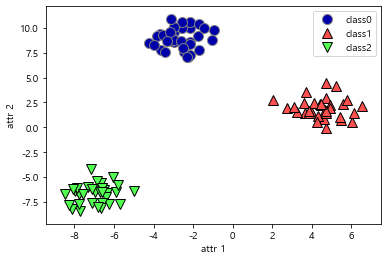

In [68]:
from sklearn.datasets import make_blobs
# 데이터 셋 가져오기 
# 3개의 클래스 2차원 데이터, 각 클래스의 데이터는 정규분포를 따른다.
X,y = make_blobs(random_state = 42)

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("attr 1")
plt.ylabel("attr 2")
plt.legend(["class0", "class1", "class2"])
plt.show()

In [69]:
from sklearn.svm import LinearSVC
X,y = make_blobs(random_state=42)
linear_svm = LinearSVC().fit(X,y)
print('계수 배열의 크기 :', linear_svm.coef_.shape)
print('절편 배열의 크기 :', linear_svm.intercept_.shape)

계수 배열의 크기 : (3, 2)
절편 배열의 크기 : (3,)


0.23140949676290898
-0.06937441693300511
-0.20400609287694926


Text(0, 0.5, 'attr 2')

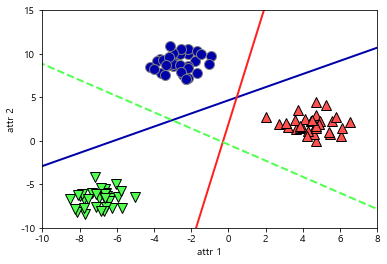

In [74]:
# 3개의 1:N 분류기가 만든 결정 경계
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
# linespace의 디폴트값은  50개
for coef, intercept, color in zip(
    linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c= color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("attr 1")
plt.ylabel("attr 2")


# 선형 분류 알고리즘 - LogisticRegression
* 유방암 데이터셋 활용

In [79]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('클래스 별 샘플 갯수 :\n {}'.format({
    n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))
}))

클래스 별 샘플 갯수 :
 {'malignant': 212, 'benign': 357}


## - 각기 다른 c값으로 학습시킨 모델의 성능확인해보기
* C값에대한 규제는 Ridge 모델과 마찬가지로 L2 규제를 활용 
* C값이 높아지면, 규제가 감소하여 LogisticRegression과 LinearSVC는 훈련세트에 가능한 최대로 맞추려고하고, 
* C값이 낮아지면 모델은 계수 벡터(w)가 0에 가까워지도록 만든다.

In [82]:
from sklearn.linear_model import LogisticRegression

#훈련/테셋으로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target, random_state =42)
#stratify -> train/test 비율을 75:25 기본값으로 쓰겠다.

print("C = 1(default)")
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 셋트 점수 :{:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 셋트 점수 :{:.3f}".format(logreg.score(X_test, y_test)))

print("\nC = 100")
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 셋트 점수 :{:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 셋트 점수 :{:.3f}".format(logreg100.score(X_test, y_test)))

print("\nC = 0.1")
logreg01 = LogisticRegression(C=0.1).fit(X_train, y_train)
print("훈련 셋트 점수 :{:.3f}".format(logreg01.score(X_train, y_train)))
print("테스트 셋트 점수 :{:.3f}".format(logreg01.score(X_test, y_test)))

C = 1(default)
훈련 셋트 점수 :0.955
테스트 셋트 점수 :0.958

C = 100
훈련 셋트 점수 :0.972
테스트 셋트 점수 :0.965

C = 0.1
훈련 셋트 점수 :0.944
테스트 셋트 점수 :0.944


* C=100일때, 훈련 세트의 정확도가 증가하고 테스트 셋의 정확도도 조금 증가한다. -> 복잡도가 높은 모델일 수록 성능이 좋다.
* C=0.1 일때는 규제가 더 강해지고, 훈련셋과 테스트 셋의 정확도가 기본매개변수(1) 일때 보다 더욱 낮아진다.